<a href="https://colab.research.google.com/github/Blantranderozari/Blantranderozari/blob/main/HOML_10_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Image Classifier using Sequentials API

Taken from *Hands-on Machine Learning with Scikit-Learn and Tensorflow* Chap 10 page 294

The dataset Fashion MNIST are 70,000 grayscale images of 28 x 28 pixels with 10 classes 

In [38]:
import tensorflow as tf
from tensorflow import keras

# load dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one
important difference is that every image is represented as a 28×28 array rather than a
1D array of size 784. Moreover, the pixel intensities are represented as grayscale images, i.e. integers (from
0 to 255) rather than floats (from 0.0 to 255.0). 60,000 images will be used for training, while 10,000 as test

In [39]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

We are going to take first 5,000 of the training datasets as validation sets and map the pixel intensities to 0 - 1 range, by dividing them with 255. 

In [40]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

Let's look at 10 first image of the training data, starting by initiating class name of the fashion products

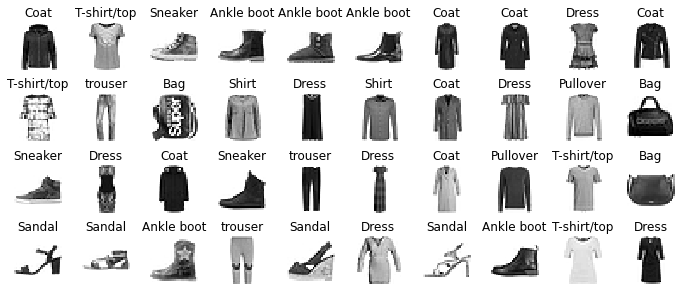

In [41]:
class_names = ["T-shirt/top", "trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

### Creating Model with Sequentials API
A classification MLP (Multi Layer Perceptron) with Input layer for 28 x 28 pixels and flattened to 784 node


In [42]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

model.layers

The model summary below show us there are 235,500 parameters. This comes from weights + bias = (784 x 300) + 300. The same also apply to next two layers.

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["Accuracy"])

This requires some explanation. First, we use the "**sparse_categorical_crossentropy**" loss because we have sparse labels (i.e., for each instance there are probabilities of the instance belong to the class). The highest probabilities show the instances belong to that class.

If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0.,
0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead.

Regarding the optimizer, "sgd" simply means that we will train the model using simple **Stochastic Gradient Descent**.

### Train and evaluate the model

In [45]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7167 - Accuracy: 0.7678 - val_loss: 0.5110 - val_Accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4874 - Accuracy: 0.8291 - val_loss: 0.4374 - val_Accuracy: 0.8562
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4411 - Accuracy: 0.8461 - val_loss: 0.4332 - val_Accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4154 - Accuracy: 0.8546 - val_loss: 0.4071 - val_Accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3939 - Accuracy: 0.8622 - val_loss: 0.3757 - val_Accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3781 - Accuracy: 0.8673 - val_loss: 0.3794 - val_Accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3658 - Accuracy: 0.8700 - val_loss: 0.3623 - val_Accuracy:

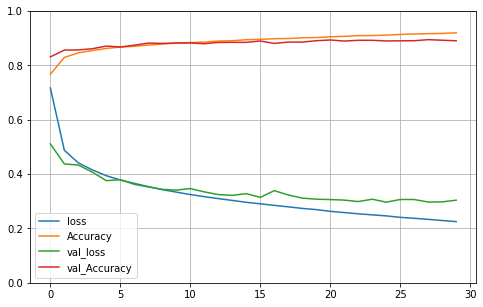

In [46]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical limit to [0,1]
plt.show()

In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3381 - Accuracy: 0.8797


[0.33808842301368713, 0.8797000050544739]

### Use the model to make prediction
We use first 10 item from the test dataset

1/1 [==============================] - 0s 15ms/step


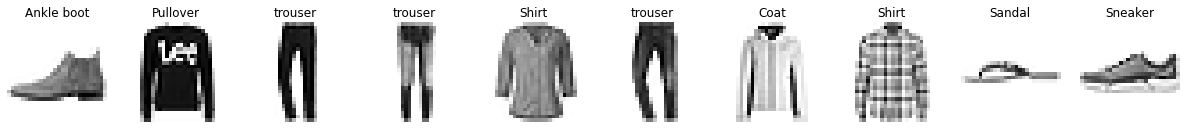

In [56]:
X_new = X_test[:10]
y_proba = model.predict(X_new);
#y_proba.round(2)

plt.figure(figsize=(21,2.4))
for index,image in enumerate(X_new):
  plt.subplot(1, 10, index + 1)
  plt.imshow(image, cmap="binary", interpolation="nearest");
  plt.axis('off')
  plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()